In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
df = pd.read_csv('./Downloads/Covvid.csv')

In [3]:
df

,Unnamed: 0,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,643,18,30,595,95,1,2
1,1,920,26,36,858,277,8,6
2,2,1406,42,39,1325,486,16,3
3,3,2075,56,49,1970,669,14,10
4,4,2877,82,58,2737,802,26,9
...,...,...,...,...,...,...,...,...
8814,8814,21209,121,11674,9414,678,5,569
8815,8815,15988,146,9959,5883,525,4,213
8816,8816,1691,483,833,375,10,4,36
8817,8817,4552,140,2815,1597,71,1,465


In [4]:
df.dtypes

Unnamed: 0       int64
Confirmed        int64
Deaths           int64
Recovered        int64
Active           int64
New cases        int64
New deaths       int64
New recovered    int64
dtype: object

In [5]:
df.isna().sum()

Unnamed: 0       0
Confirmed        0
Deaths           0
Recovered        0
Active           0
New cases        0
New deaths       0
New recovered    0
dtype: int64

In [6]:
columns_to_drop=['Unnamed: 0']

In [7]:
df= df.drop(columns_to_drop, axis=1)

In [8]:
df

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,643,18,30,595,95,1,2
1,920,26,36,858,277,8,6
2,1406,42,39,1325,486,16,3
3,2075,56,49,1970,669,14,10
4,2877,82,58,2737,802,26,9
...,...,...,...,...,...,...,...
8814,21209,121,11674,9414,678,5,569
8815,15988,146,9959,5883,525,4,213
8816,1691,483,833,375,10,4,36
8817,4552,140,2815,1597,71,1,465


<Axes: >

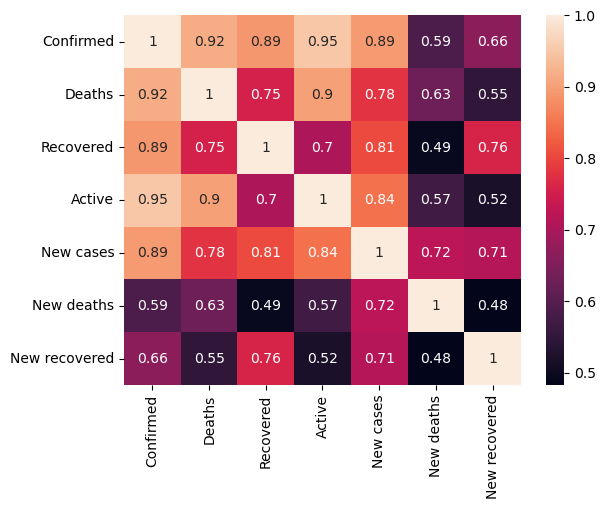

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [10]:
Y=df['New cases']

In [11]:
Y

0        95
1       277
2       486
3       669
4       802
       ... 
8814    678
8815    525
8816     10
8817     71
8818    192
Name: New cases, Length: 8819, dtype: int64

In [12]:
X=df.drop('New cases',axis=1)

In [13]:
X

,Confirmed,Deaths,Recovered,Active,New deaths,New recovered
0,643,18,30,595,1,2
1,920,26,36,858,8,6
2,1406,42,39,1325,16,3
3,2075,56,49,1970,14,10
4,2877,82,58,2737,26,9
...,...,...,...,...,...,...
8814,21209,121,11674,9414,5,569
8815,15988,146,9959,5883,4,213
8816,1691,483,833,375,4,36
8817,4552,140,2815,1597,1,465


In [14]:
!pip install scikit-learn

In [15]:
from sklearn. model_selection import train_test_split

In [16]:
from sklearn. linear_model import LogisticRegression

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.4, random_state=101)

In [18]:
log_model=LogisticRegression()

In [19]:
log_model.fit(X_train, y_train)

/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predict=log_model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      18.0
           2       0.00      0.00      0.00      12.0
           3       0.00      0.00      0.00      12.0
           4       0.00      0.00      0.00      13.0
           5       0.00      0.00      0.00      16.0
           6       0.00      0.00      0.00      16.0
           7       0.00      0.00      0.00      18.0
           8       0.00      0.00      0.00      26.0
           9       0.00      0.00      0.00      14.0
          10       0.00      0.00      0.00      10.0
          11       0.00      0.00      0.00      13.0
          12       0.00      0.00      0.00      15.0
          13       0.00      0.00      0.00      19.0
          14       0.00      0.00      0.00      17.0
          15       0.00      0.00      0.00      21.0
          16       0.00      0.00      0.00      11.0
          17       0.00      0.00      0.00      10.0
          18       0.00    

/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oem/anaconda3/lib/python3.11/site-packa